In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv(r'/home/ubundu/Downloads/students_dropout_academic_success.csv')
df.head()

Marital Status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      12  ...                                    0   
1                       3  ...                                    0   
2                      37  ...                                    0   
3                      37  ...                                    0   
4                      38  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [5]:
df.shape

(4424, 37)

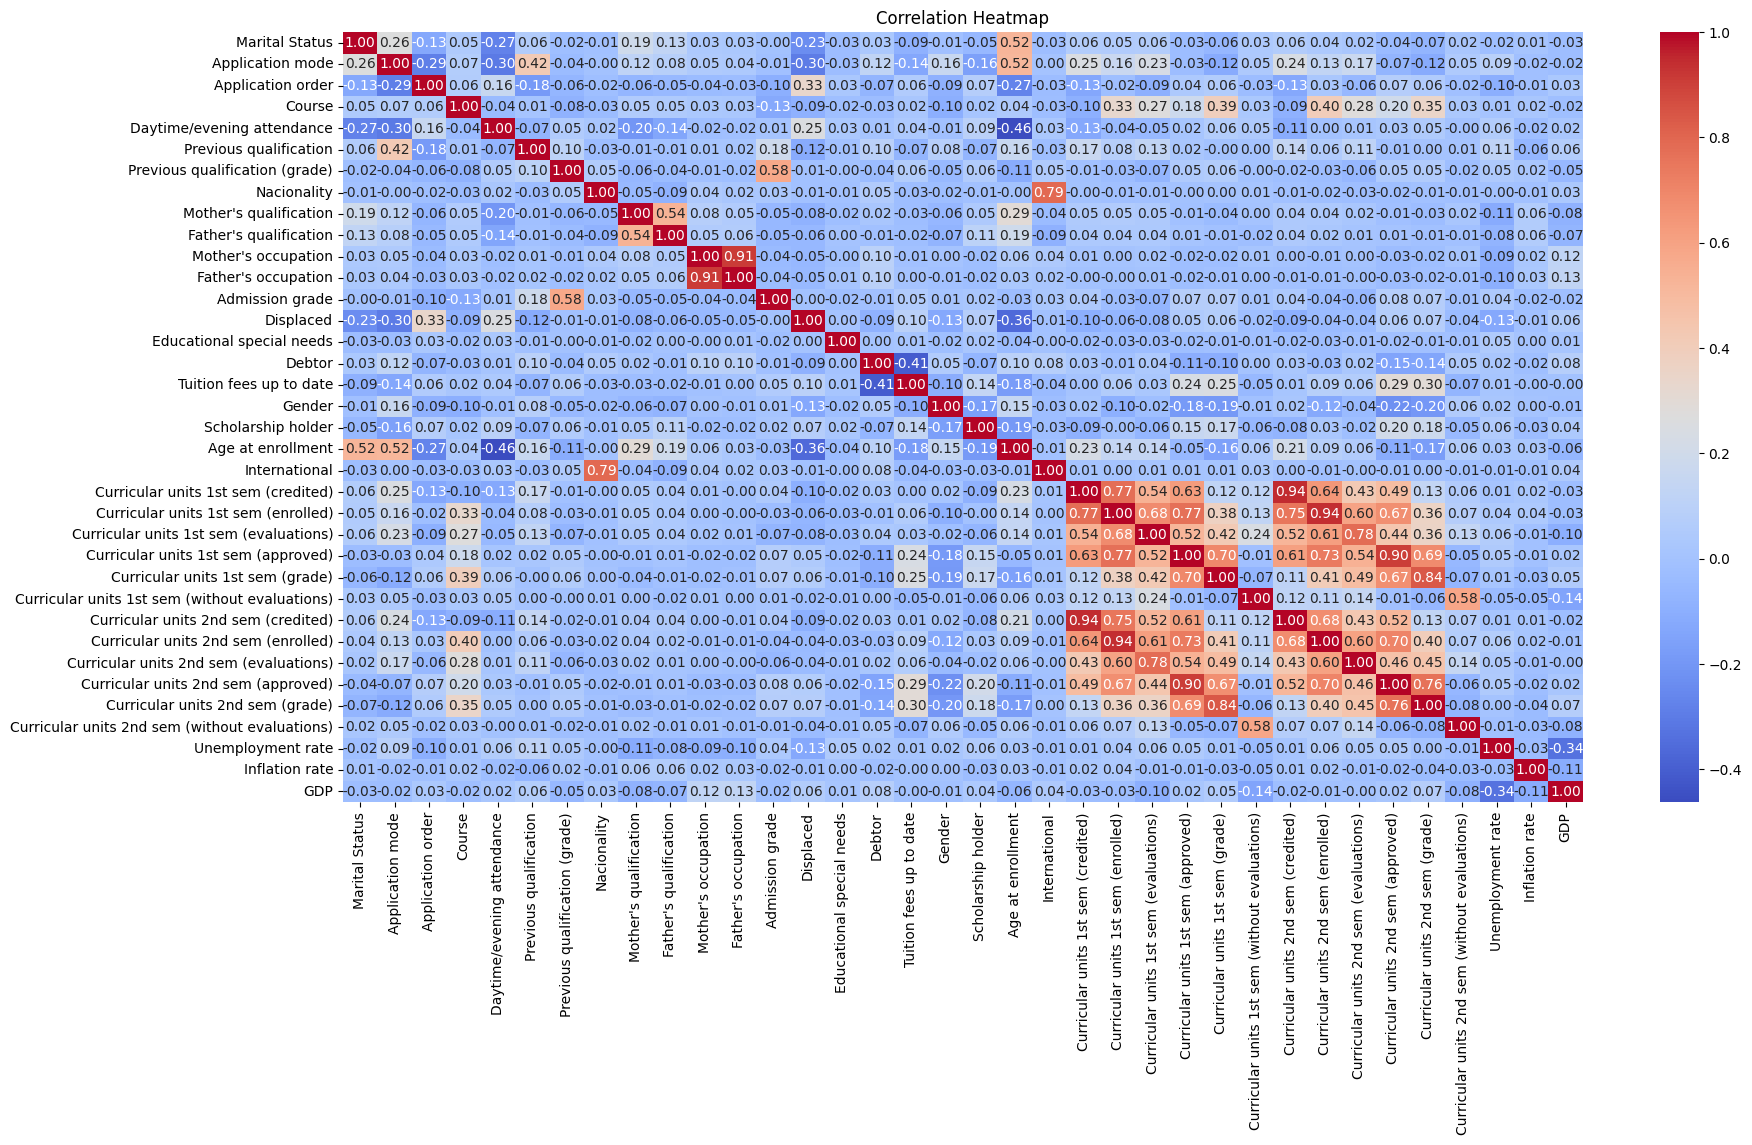

In [6]:
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [8]:
df.isna().sum()

Marital Status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [9]:
x= df.drop('target',axis=1)
y=df['target']

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.9,random_state=42)

------------------------
Support Vector Machine
---------------------

In [9]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [81]:
svm_pred=svm.predict(x_test)


In [11]:
svm.score(x_test,y_test)

0.48081264108352145

In [32]:
kernel1=SVC(kernel='linear')
kernel1.fit(x_train,y_train)

SVC(kernel='linear')

In [33]:
kernel1.score(x_test,y_test)

0.7516930022573364

In [34]:
kernel2=SVC(kernel='poly')
kernel2.fit(x_train,y_train)

SVC(kernel='poly')

In [35]:
kernel2.score(x_test,y_test)

0.48081264108352145

In [36]:
kernel3=SVC(kernel='rbf')
kernel3.fit(x_train,y_train)

SVC()

In [37]:
kernel3.score(x_test,y_test)

0.48081264108352145

---------------------
Logistic Regression
------------------

In [11]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(x_train,y_train)

/home/ubundu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
log_pred=logistic.predict(x_test)


In [13]:
logistic.score(x_test,y_test)

0.6681715575620768

-------------------
K-Nearest Neighbour
------------------

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [16]:
knn.score(x_test,y_test)

0.600451467268623

In [17]:
accuracy_rate=[]
for i in range(1,40):


    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    score=knn.score(x_test,y_test)
    accuracy_rate.append(score)

Text(0, 0.5, 'accuracy_rate')

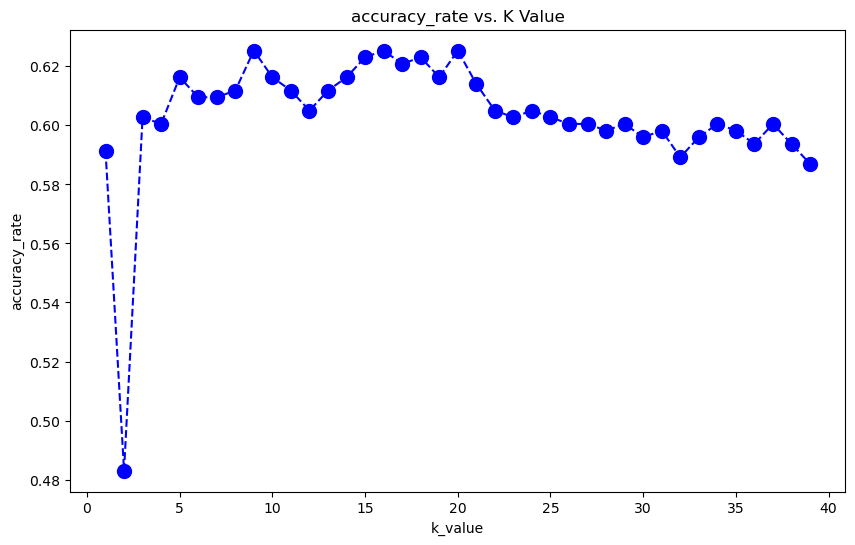

In [18]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='blue',markersize=10)
plt.title('accuracy_rate vs. K Value')
plt.xlabel('k_value')
plt.ylabel('accuracy_rate')

In [19]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rate')

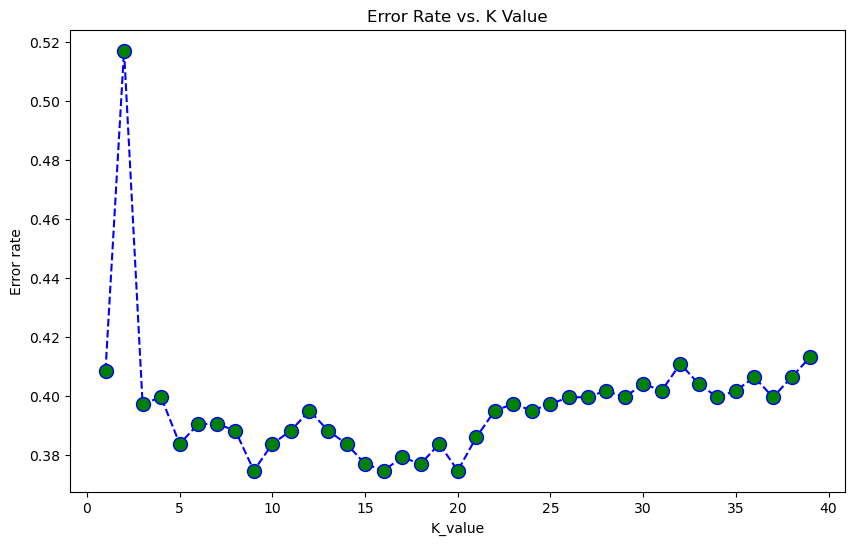

In [20]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',marker='o',linestyle='dashed',
        markerfacecolor='green',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_value')
plt.ylabel('Error rate')

In [21]:
knn1=KNeighborsClassifier(n_neighbors=15)
knn1.fit(x_train,y_train)
knn1.score(x_test,y_test)

0.6230248306997742

In [22]:
knn2=KNeighborsClassifier(n_neighbors=16)
knn2.fit(x_train,y_train)
knn2.score(x_test,y_test)

0.6252821670428894

In [23]:
knn3=KNeighborsClassifier(n_neighbors=18)
knn3.fit(x_train,y_train)
knn3.score(x_test,y_test)

0.6230248306997742

In [24]:
knn_predict=knn1.predict(x_test)

Text(0, 0.5, 'Data values')

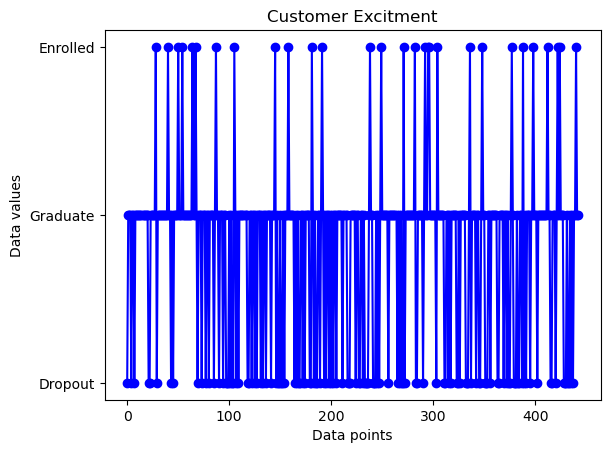

In [25]:
plt.plot(knn_predict,color='blue',linestyle='-',marker='o')
plt.title('Customer Excitment')  
plt.xlabel('Data points')  
plt.ylabel('Data values')

------------
GaussianNB
-----------

In [26]:
from sklearn.naive_bayes import GaussianNB
naive=GaussianNB()
naive.fit(x_train,y_train)

GaussianNB()

In [82]:
naive_pred=naive.predict(x_test)

In [28]:
naive.score(x_test,y_test)

0.7042889390519187

--------------------
RandomForestClassifier
-------------------

In [29]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier()
random.fit(x_train,y_train)

RandomForestClassifier()

In [30]:
random_predict=random.predict(x_test)
random_predict

array(['Dropout', 'Graduate', 'Graduate', 'Graduate', 'Dropout',
       'Enrolled', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Enrolled', 'Graduate', 'Graduate', 'Dropout', 'Graduate',
       'Graduate', 'Dropout', 'Dropout', 'Graduate', 'Graduate',
       'Graduate', 'Dropout', 'Graduate', 'Enrolled', 'Dropout',
       'Graduate', 'Dropout', 'Dropout', 'Dropout', 'Dropout', 'Enrolled',
       'Graduate', 'Graduate', 'Graduate', 'Enrolled', 'Dropout',
       'Dropout', 'Graduate', 'Dropout', 'Dropout', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Enrolled', 'Dropout', 'Enrolled', 'Dropout',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Dropout',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Dropout', 'Graduate',
       'Graduate', 'Dropout', 'Enrolled', 'Graduate', 'Graduate',
   

In [31]:
random.score(x_test,y_test)

0.781038374717833

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report

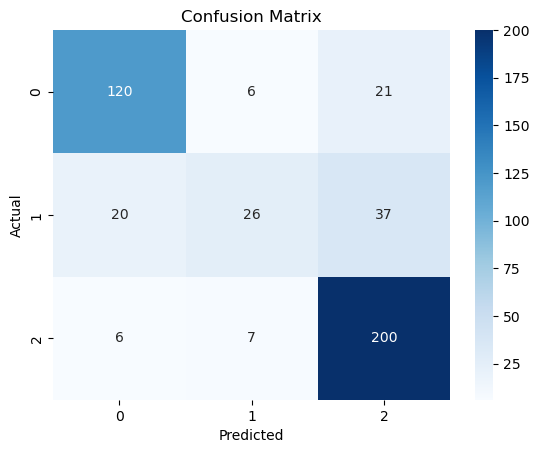

In [33]:
import seaborn as sns

cm = confusion_matrix(y_test, random_predict)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

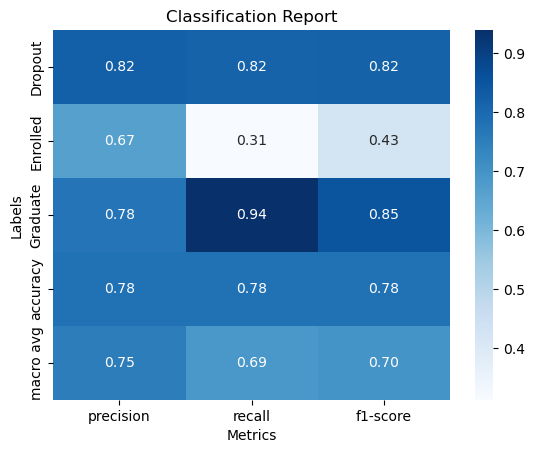

In [34]:
# Generate classification report as dictionary
report = classification_report(y_test, random_predict, output_dict=True)

# Convert to DataFrame
df_report = pd.DataFrame(report).transpose()

# Plot the basic heatmap
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, fmt='.2f', cmap='Blues')
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Labels')
plt.show()

-----------------------
DecisionTreeClassifier
-----------------------

In [35]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [83]:
tree_pred=tree.predict(x_test)

In [37]:
tree.score(x_test,y_test)

0.6862302483069977

In [76]:
import xgboost as xgb
boost = xgb.XGBClassifier()
boost.fit(x_train, y_train)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got ['Dropout' 'Enrolled' 'Graduate']

In [74]:
boost.predict(x_test)

NotFittedError: need to call fit or load_model beforehand

In [75]:
boost.score(x_test,y_test)

NotFittedError: need to call fit or load_model beforehand

--------------
XGBClassifier
---------------

In [77]:
from sklearn.preprocessing import LabelEncoder

# Assume y contains ['Dropout', 'Enrolled', 'Graduate']
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(le.classes_)  # ['Dropout' 'Enrolled' 'Graduate']
print(y_encoded)    # [0, 1, 2, 1, 0, 2, ...]

boost.fit(x, y_encoded)


['Dropout' 'Enrolled' 'Graduate']
[0 2 0 ... 0 2 2]


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [78]:
y_pred = boost.predict(x_test)
y_pred_labels = le.inverse_transform(y_pred)
print(y_pred_labels)  # ['Graduate', 'Dropout', ...]


['Dropout' 'Graduate' 'Graduate' 'Graduate' 'Dropout' 'Graduate'
 'Enrolled' 'Dropout' 'Graduate' 'Graduate' 'Graduate' 'Graduate'
 'Dropout' 'Graduate' 'Dropout' 'Enrolled' 'Enrolled' 'Graduate'
 'Enrolled' 'Graduate' 'Graduate' 'Dropout' 'Dropout' 'Graduate'
 'Graduate' 'Enrolled' 'Dropout' 'Enrolled' 'Enrolled' 'Dropout'
 'Enrolled' 'Dropout' 'Dropout' 'Dropout' 'Dropout' 'Enrolled' 'Graduate'
 'Graduate' 'Graduate' 'Enrolled' 'Dropout' 'Dropout' 'Graduate' 'Dropout'
 'Dropout' 'Graduate' 'Graduate' 'Graduate' 'Graduate' 'Dropout'
 'Enrolled' 'Graduate' 'Enrolled' 'Dropout' 'Enrolled' 'Graduate'
 'Graduate' 'Graduate' 'Graduate' 'Graduate' 'Graduate' 'Graduate'
 'Graduate' 'Dropout' 'Graduate' 'Graduate' 'Graduate' 'Enrolled'
 'Dropout' 'Dropout' 'Graduate' 'Graduate' 'Dropout' 'Enrolled' 'Graduate'
 'Graduate' 'Graduate' 'Graduate' 'Enrolled' 'Graduate' 'Dropout'
 'Dropout' 'Graduate' 'Dropout' 'Graduate' 'Enrolled' 'Graduate'
 'Graduate' 'Graduate' 'Graduate' 'Dropout' 'Dropout' '

In [79]:
boost.score(x_test,y_test)

0.0

---------------
GaussianNB
------------

In [41]:
from sklearn.naive_bayes import GaussianNB
naive=GaussianNB()
naive.fit(x_train,y_train)

GaussianNB()

In [84]:
guassian_pred=naive.predict(x_test)


Text(0, 0.5, 'Data values')

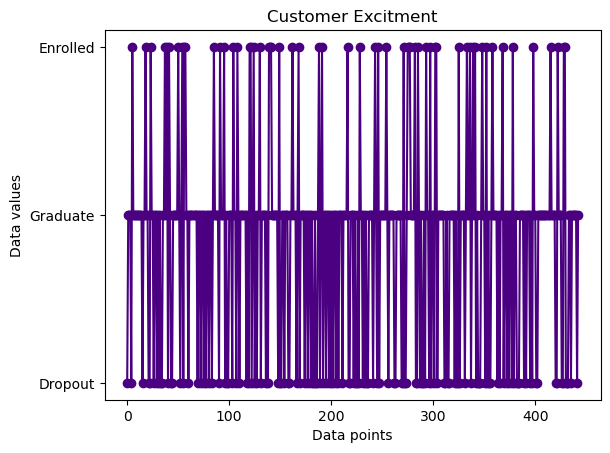

In [45]:
plt.plot(guassian_pred,color='indigo',linestyle='-',marker='o')
plt.title('Customer Excitment')  
plt.xlabel('Data points')  
plt.ylabel('Data values')

In [46]:
naive.score(x_test,y_test)

0.7042889390519187

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [34]:

rf_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [1, 5, 10]
}

gdc = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, return_train_score=True)

In [35]:
gdc

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 5, 10]}, return_train_score=True)

In [36]:
gdc.fit(x,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 5, 10]}, return_train_score=True)

In [37]:
gdc.best_params_

{'n_estimators': 10}

In [38]:

from sklearn import svm

model_params = {
    'svm': {
        'model': svm.SVC(),
        'params': {
            'gamma': [1, 10, 20],
            'C': [1, 10, 20],
            'kernel': ['rbf', 'poly', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1, 5, 10]
        }
    }
}


In [ ]:
scores=[]
for model_name in model_params:
    mp=model_params[model_name]
    gds=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=True)
    gds.fit(x,y)
    scores.append({'model':model_name,'best_score':gds.best_score_,'best_params':gds.best_params_})

In [ ]:
scores

In [ ]:
models={'logistic':{'model':LogisticRegression(),'params':{}},
        'random_forest':{'model':RandomForestClassifier(),'params':{'n_estimators':[1,10,20,100]}},
        'decision_tree':{'model':DecisionTreeClassifier(),'params':{}},
        'Gaussian':{'model':GaussianNB(),'params':{}},
        'Bernauli':{'model':BernoulliNB(),'params':{}},
        'SVM':{'model':SVC(),'params':{'gamma':[1,2,100],'C':[1,2,5,100],'kernel':['poly','linear','sigmoid','rbf']}}}

result=[]
for i in models:
    a=models.get(i)
    model=a.get('model')
    params=a.get('params')
    cv=GridSearchCV(model,params,cv=5,return_train_score=True)
    cv.fit(x,y)
    bp=cv.best_params_
    bs=cv.best_score_
    t_res={'model':i,'best_params':bp,'best_score':bs}
    result.append(t_res)
f=pd.DataFrame(result)
        